In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

# metadata
print(credit_approval.metadata)

# variable information
print(credit_approval.variables)


{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [4]:
#Displaying the feature and target variable values
print(X)
print(y)

     A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[690 rows x 15 columns]
    A16
0     +
1     +
2     +
3     +
4     +
..   ..
685   -
686   -
687   -
688   -

In [5]:
# Reverse the order of columns in DataFrame X
X_reversed = X.iloc[:, ::-1]
print(X_reversed)

    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0

[690 rows x 15 columns]


In [6]:
# Concatenate reversed X (features) and y (target variable) into a single DataFrame
dataframe = pd.concat([X_reversed, y], axis=1)

In [7]:
#Shape of the dataframe
dataframe.shape

(690, 16)

In [8]:
#Printing the head of the dataframe
dataframe.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


The dataset, obtained from the UCI machine learning repository with strict data confidentiality measures, has been anonymized to protect sensitive information. However, referencing the information available in the provided [blog](https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html), we can identify the specific variable names associated with the dataset. These variables include Gender, Age, Debt, Marital Status, Banking Customer Status, Education Level, Ethnicity, Years of Employment, Prior Default History, Employment Status, Credit Score, Driver's License Status, Citizenship, Zip Code, Income, and Approval Status.

In [9]:
#Changing the varible names into meaningful values
dataframe_cols = ['Gender', 'Age', 'Debt', 'MaritalStatus', 'BankCustomerStatus', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefaultHistory', 'EmploymentStatus', 'CreditScore', 'DriversLicenseStatus','Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
dataframe.columns = dataframe_cols

In [10]:
#Displaying the data after changing variable names
#Head
dataframe.head(25)

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [11]:
#Tail
dataframe.tail(25)

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,0.0,0,-
666,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,-
667,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,80.0,5,-
668,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252.0,0,-
669,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,120.0,1,-
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465.0,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0.0,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240.0,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260.0,246,-


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                678 non-null    object 
 1   Age                   678 non-null    float64
 2   Debt                  690 non-null    float64
 3   MaritalStatus         684 non-null    object 
 4   BankCustomerStatus    684 non-null    object 
 5   EducationLevel        681 non-null    object 
 6   Ethnicity             681 non-null    object 
 7   YearsEmployed         690 non-null    float64
 8   PriorDefaultHistory   690 non-null    object 
 9   EmploymentStatus      690 non-null    object 
 10  CreditScore           690 non-null    int64  
 11  DriversLicenseStatus  690 non-null    object 
 12  Citizen               690 non-null    object 
 13  ZipCode               677 non-null    float64
 14  Income                690 non-null    int64  
 15  ApprovalStatus        6

In [13]:
dataframe.describe(include = 'all')

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [14]:
# Dealing with the missing values
data = dataframe.fillna(dataframe.mean())

# Check if there are any missing values left
print(data.isnull().sum())

Gender                  12
Age                      0
Debt                     0
MaritalStatus            6
BankCustomerStatus       6
EducationLevel           9
Ethnicity                9
YearsEmployed            0
PriorDefaultHistory      0
EmploymentStatus         0
CreditScore              0
DriversLicenseStatus     0
Citizen                  0
ZipCode                  0
Income                   0
ApprovalStatus           0
dtype: int64


<ipython-input-14-44402bcbb925>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = dataframe.fillna(dataframe.mean())


In [15]:
# Filling missing values with mode for categorical variables
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['MaritalStatus'] = data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0])
data['BankCustomerStatus'] = data['BankCustomerStatus'].fillna(data['BankCustomerStatus'].mode()[0])
data['EducationLevel'] = data['EducationLevel'].fillna(data['EducationLevel'].mode()[0])
data['Ethnicity'] = data['Ethnicity'].fillna(data['Ethnicity'].mode()[0])

# Check if there are any missing values left
print(data.isnull().sum())

Gender                  0
Age                     0
Debt                    0
MaritalStatus           0
BankCustomerStatus      0
EducationLevel          0
Ethnicity               0
YearsEmployed           0
PriorDefaultHistory     0
EmploymentStatus        0
CreditScore             0
DriversLicenseStatus    0
Citizen                 0
ZipCode                 0
Income                  0
ApprovalStatus          0
dtype: int64


<ipython-input-16-0584c0b49fc6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


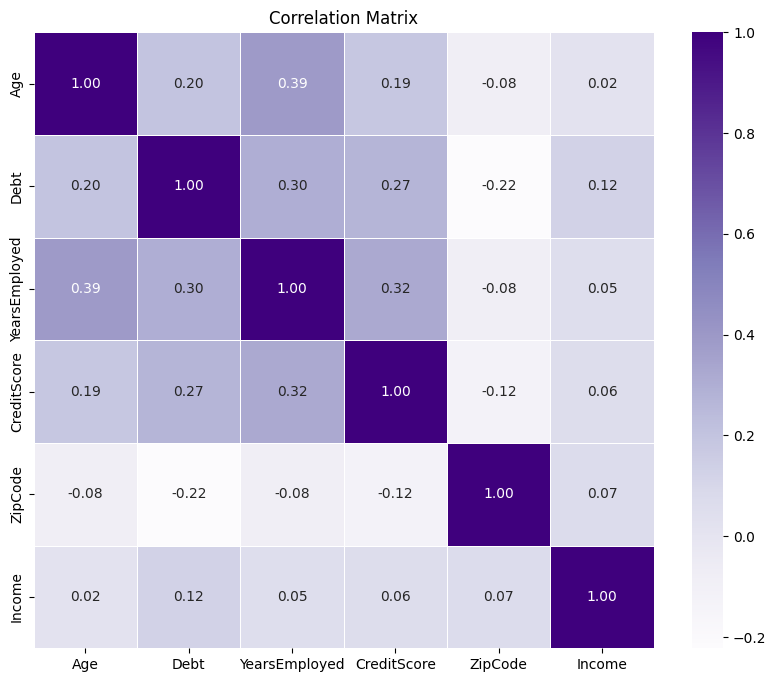

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
lbl_en = LabelEncoder()

for col in data.columns:
    if data[col].dtypes=='object':
        data[col]=lbl_en.fit_transform(data[col])

#Displaying the head
data.head()

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


Number of outliers before handling: 303
Number of outliers after handling: 0


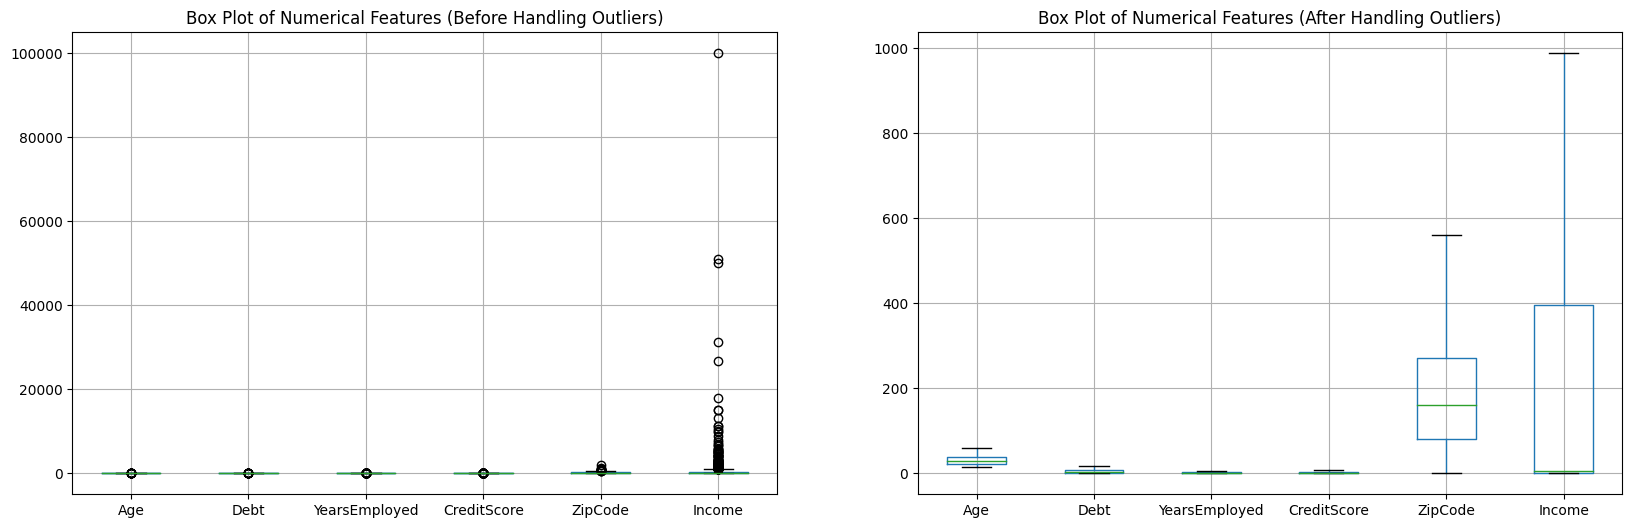

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to handle outliers by capping them to lower and upper bounds
def handle_outliers(series):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Find lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to lower and upper bounds
    series = series.clip(lower=lower_bound, upper=upper_bound)

    return series

# Select numerical columns for outlier detection and handling
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

# Count outliers before handling
outliers_before = (data[numerical_columns] < data[numerical_columns].quantile(0.25) - 1.5 * (data[numerical_columns].quantile(0.75) - data[numerical_columns].quantile(0.25))) | (data[numerical_columns] > data[numerical_columns].quantile(0.75) + 1.5 * (data[numerical_columns].quantile(0.75) - data[numerical_columns].quantile(0.25)))
num_outliers_before = outliers_before.sum().sum()

# Handle outliers by capping them to lower and upper bounds
data_outliers_handled = data.copy()  # Create a copy of the original DataFrame
for column in numerical_columns:
    data_outliers_handled[column] = handle_outliers(data[column])

# Count outliers after handling
outliers_after = (data_outliers_handled[numerical_columns] < data_outliers_handled[numerical_columns].quantile(0.25) - 1.5 * (data_outliers_handled[numerical_columns].quantile(0.75) - data_outliers_handled[numerical_columns].quantile(0.25))) | (data_outliers_handled[numerical_columns] > data_outliers_handled[numerical_columns].quantile(0.75) + 1.5 * (data_outliers_handled[numerical_columns].quantile(0.75) - data_outliers_handled[numerical_columns].quantile(0.25)))
num_outliers_after = outliers_after.sum().sum()

# Print the number of outliers before and after handling
print("Number of outliers before handling:", num_outliers_before)
print("Number of outliers after handling:", num_outliers_after)

# Visualize outliers using box plots
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
data[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Features (Before Handling Outliers)')
plt.subplot(1, 2, 2)
data_outliers_handled[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Features (After Handling Outliers)')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_outliers_handled.drop(columns=['ApprovalStatus'])  # Features
y = data_outliers_handled['ApprovalStatus']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (483, 15)
X_test shape: (207, 15)
y_train shape: (483,)
y_test shape: (207,)


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the scaled training and testing data
print("Scaled Training Data:")
print(X_train_scaled_df.head())
print("\nScaled Testing Data:")
print(X_test_scaled_df.head())


Scaled Training Data:
   Gender       Age      Debt  MaritalStatus  BankCustomerStatus  \
0     0.0  0.100400  0.559970            0.5                 0.0   
1     1.0  0.071592  0.005146            1.0                 1.0   
2     1.0  0.188116  0.696179            1.0                 1.0   
3     1.0  0.634221  1.000000            0.5                 0.0   
4     1.0  0.071592  0.015134            0.5                 0.0   

   EducationLevel  Ethnicity  YearsEmployed  PriorDefaultHistory  \
0        0.769231      0.875       0.191607                  1.0   
1        0.076923      0.875       0.006334                  0.0   
2        0.692308      0.875       0.237530                  0.0   
3        0.769231      0.375       0.033254                  1.0   
4        0.769231      0.875       0.053048                  0.0   

   EmploymentStatus  CreditScore  DriversLicenseStatus  Citizen   ZipCode  \
0               1.0     0.533333                   0.0      0.0  0.107143   
1     

# **Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

# Train the model on the training data
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8357487922705314


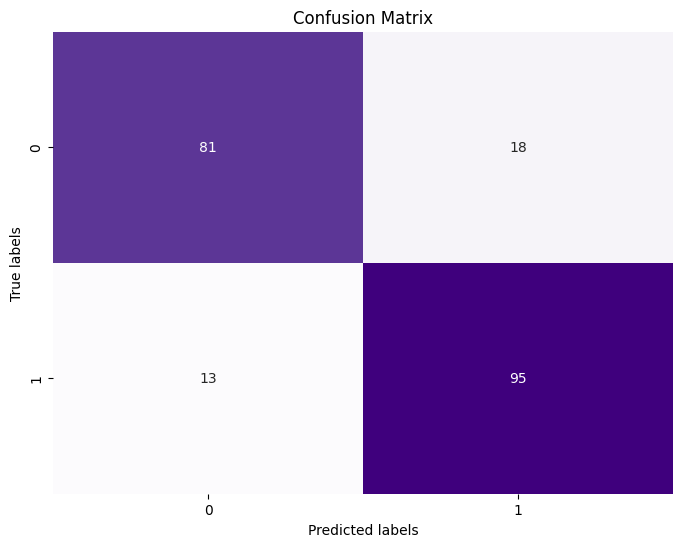

[[81 18]
 [13 95]]


In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(conf_matrix)

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty term
    'solver': ['liblinear']                # Solver for optimization problem
}

# Initialize logistic regression model
logistic_reg_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross Validation
grid_search.fit(X_train_scaled, y_train)

# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found during grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8405797101449275


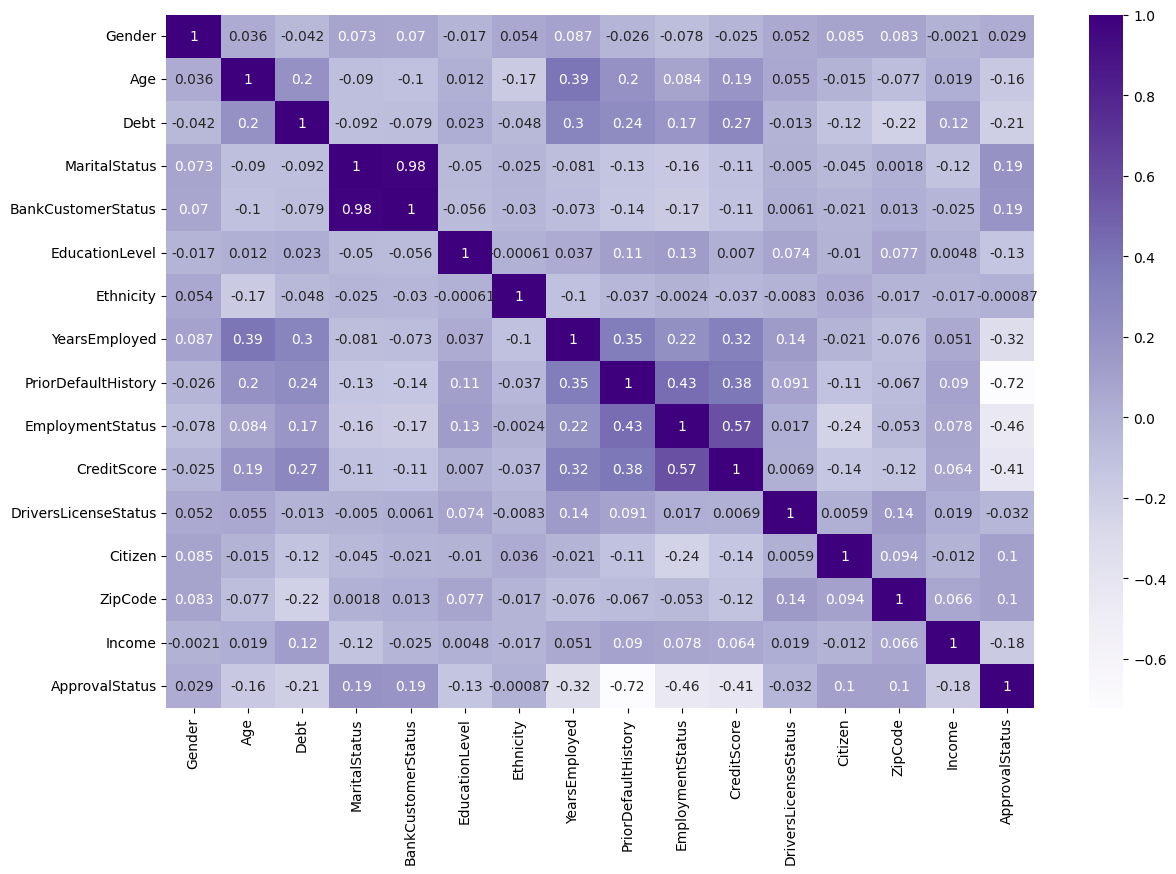

In [24]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,9))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Purples")

In [25]:
#absolute value of correlcation with ApprovalStatus
approvalStatus_corr = np.abs(corrmat['ApprovalStatus'])
#selecting columns with correlaction of 0.19 and above
mask = approvalStatus_corr >= 0.17
approvalStatus_corr = approvalStatus_corr[mask]
approvalStatus_corr.drop(index=['BankCustomerStatus','MaritalStatus','ApprovalStatus'], inplace=True)
approvalStatus_corr

Debt                   0.206294
YearsEmployed          0.322475
PriorDefaultHistory    0.720407
EmploymentStatus       0.458301
CreditScore            0.406410
Income                 0.175657
Name: ApprovalStatus, dtype: float64

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Selecting the features based on correlation
selected_features = approvalStatus_corr.index

# Extracting features and target variable
X = data[selected_features]
y = data['ApprovalStatus']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Initialize the logistic regression model with a higher max_iter value
logistic_reg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8502415458937198


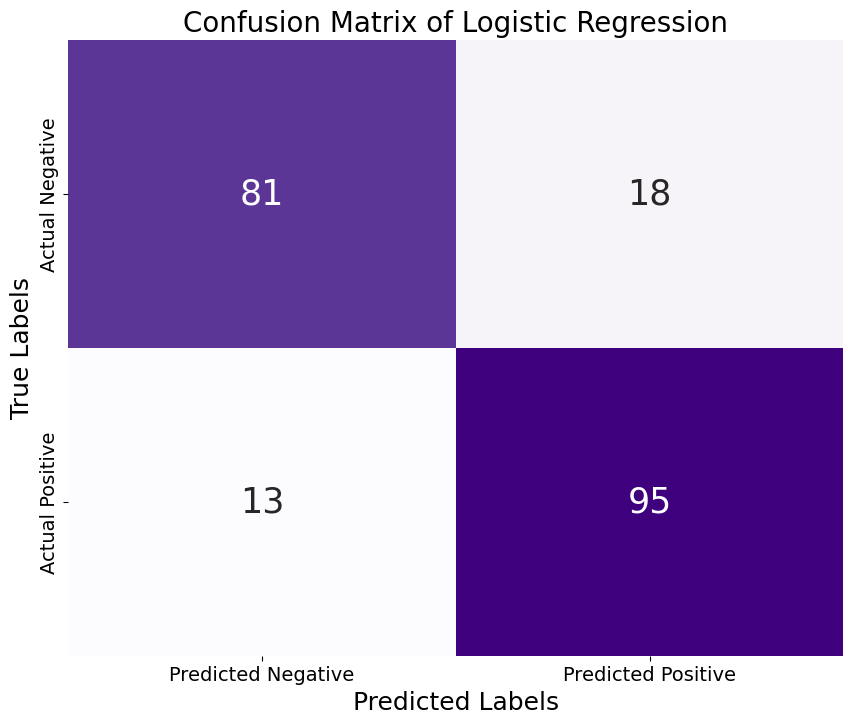

[[81 18]
 [13 95]]


In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for test set


plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],  # Adjusted for clarity
            yticklabels=['Actual Negative', 'Actual Positive'],  # Adjusted for clarity
            annot_kws={"size": 25})  # Increase size of the values inside the plot

plt.title('Confusion Matrix of Logistic Regression', size=20)  # Increase title font size
plt.xlabel('Predicted Labels', size=18)  # Increase x-axis label font size
plt.ylabel('True Labels', size=18)  # Increase y-axis label font size
plt.xticks(size=14)  # Increase x-axis ticks font size
plt.yticks(size=14)  # Increase y-axis ticks font size
plt.savefig('Conf_mat.png')
plt.show()
print(conf_matrix_test)

In [28]:
# Evaluate model performance on training set
train_accuracy = logistic_reg_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate model performance on testing set
test_accuracy = logistic_reg_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8633540372670807
Testing Accuracy: 0.8502415458937198


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, and F1-score for training data
train_precision = precision_score(y_train, logistic_reg_model.predict(X_train))
train_recall = recall_score(y_train, logistic_reg_model.predict(X_train))
train_f1_score = f1_score(y_train, logistic_reg_model.predict(X_train))
train_roc_auc = roc_auc_score(y_train, logistic_reg_model.predict(X_train))

# Calculate precision, recall, and F1-score for testing data
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Training Data:")
print("  Accuracy:", train_accuracy)
print("  Precision:", train_precision)
print("  Recall:", train_recall)
print("  F1-score:", train_f1_score)
print("ROC AUC Score:", train_roc_auc)

print("\nTesting Data:")
print("  Accuracy:", test_accuracy)
print("  Precision:", test_precision)
print("  Recall:", test_recall)
print("  F1-score:", test_f1_score)
print("ROC AUC Score:", test_roc_auc)


Evaluation Metrics:
Training Data:
  Accuracy: 0.8633540372670807
  Precision: 0.8943396226415095
  Recall: 0.8618181818181818
  F1-score: 0.8777777777777778
ROC AUC Score: 0.8636013986013986

Testing Data:
  Accuracy: 0.8502415458937198
  Precision: 0.8407079646017699
  Recall: 0.8796296296296297
  F1-score: 0.8597285067873304
ROC AUC Score: 0.8489057239057239


In [30]:
from tabulate import tabulate

# Define the evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC Score'],
    'Training Data': [0.863, 0.894, 0.862, 0.878, 0.864],
    'Testing Data': [0.850, 0.841, 0.880, 0.860, 0.849]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set the 'Metric' column as the index
metrics_df.set_index('Metric', inplace=True)

# Print the DataFrame as a table with a heading
print("Comparison of Evaluation Metrics (Train vs. Test)")
print(tabulate(metrics_df, headers='keys', tablefmt='grid', floatfmt=".3f"))


Comparison of Evaluation Metrics (Train vs. Test)
+---------------+-----------------+----------------+
| Metric        |   Training Data |   Testing Data |
+===============+=================+================+
| Accuracy      |           0.863 |          0.850 |
+---------------+-----------------+----------------+
| Precision     |           0.894 |          0.841 |
+---------------+-----------------+----------------+
| Recall        |           0.862 |          0.880 |
+---------------+-----------------+----------------+
| F1-score      |           0.878 |          0.860 |
+---------------+-----------------+----------------+
| ROC AUC Score |           0.864 |          0.849 |
+---------------+-----------------+----------------+


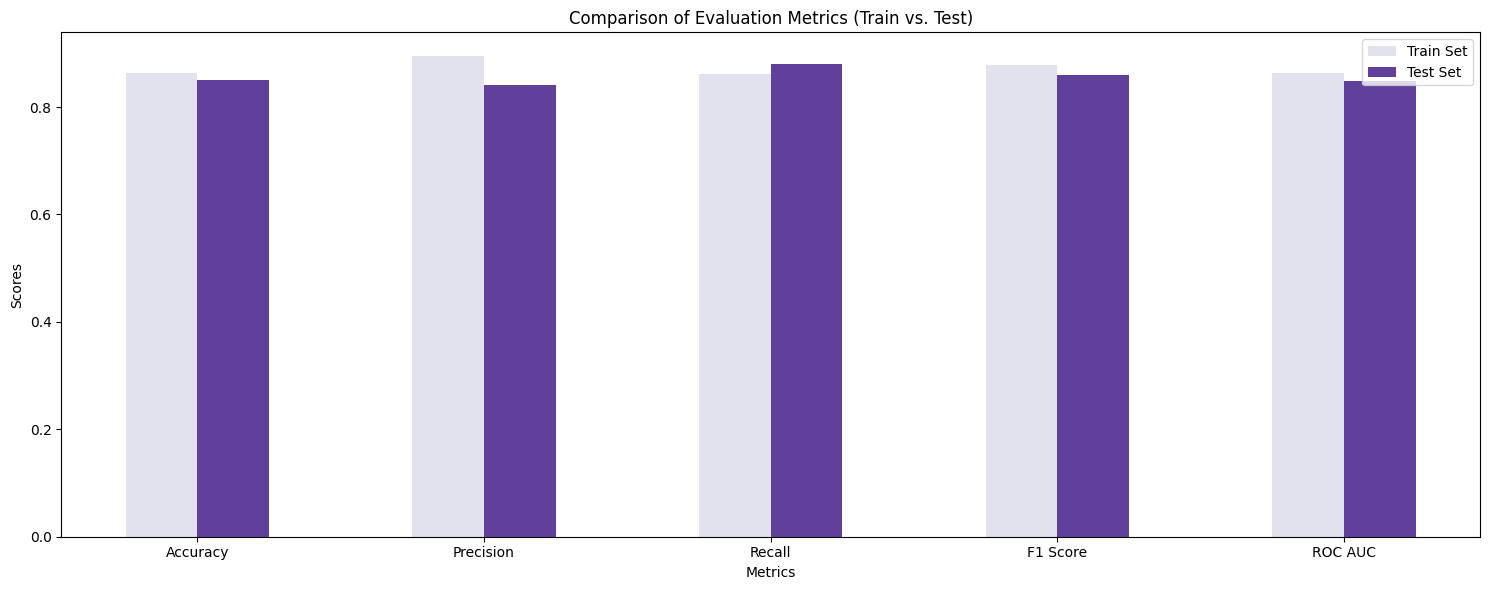

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation Metric Names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Train Set Metrics
train_metrics = [train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc]

# Test Set Metrics
test_metrics = [test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc]

# Number of Evaluation Metrics
num_metrics = len(metric_names)

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Set bar width
bar_width = 0.25

# Set index for the metrics
index = np.arange(num_metrics)

# Define colors
colors = plt.cm.Purples(np.linspace(0.2, 0.8, 2))  # Shades of purple

# Plot train metrics
train_bars = ax.bar(index, train_metrics, bar_width, color=colors[0], label='Train Set')

# Plot test metrics
test_bars = ax.bar(index + bar_width, test_metrics, bar_width, color=colors[1], label='Test Set')

# Set labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics (Train vs. Test)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

# **Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
decision_tree_model = DecisionTreeClassifier()


In [54]:
decision_tree_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [55]:
y_pred = decision_tree_model.predict(X_test_scaled)


In [57]:
accuracy_de = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_de)


Accuracy: 0.42028985507246375


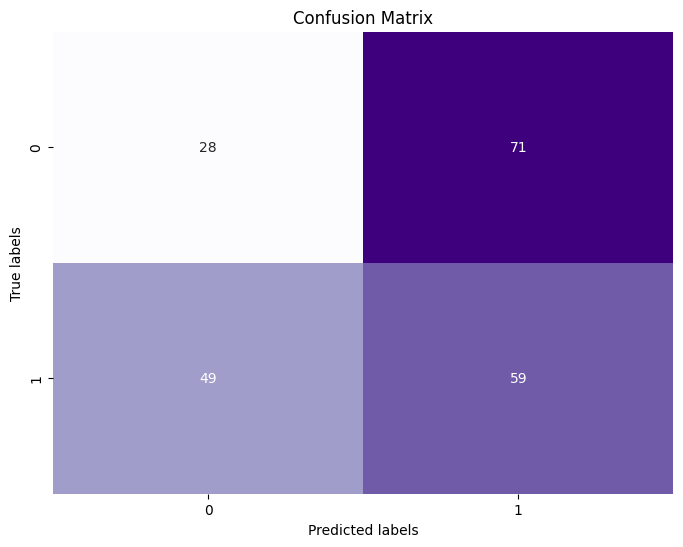

[[28 71]
 [49 59]]


In [58]:
conf_matrix_de = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_de, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(conf_matrix_de)

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]               # Minimum number of samples required to be at a leaf node
}

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and hyperparameters grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross Validation
grid_search.fit(X_train, y_train)

# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found during grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8260869565217391


In [163]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
# Initialize Recursive Feature Elimination (RFE) with the decision tree classifier
rfe = RFE(estimator=decision_tree, n_features_to_select=5)  # Select top 5 features, you can adjust this number

# Fit RFE to the training data and transform the data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train the decision tree classifier on the selected features
decision_tree.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred_selected = decision_tree.predict(X_test_selected)

# Evaluate the model's performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)


Accuracy with Selected Features: 0.8260869565217391
Selected Features: Index(['Debt', 'YearsEmployed', 'PriorDefaultHistory', 'EmploymentStatus',
       'Income'],
      dtype='object')


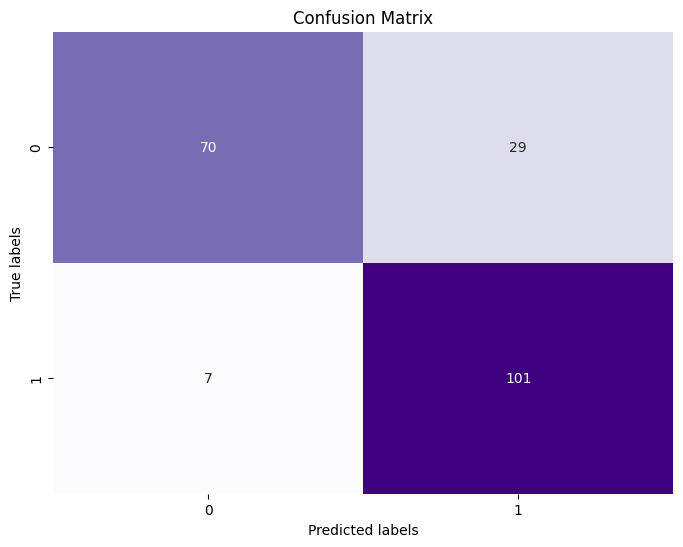

[[ 70  29]
 [  7 101]]


In [164]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for test set with selected features
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)

# Plot confusion matrix for test set with selected features
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_selected, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(conf_matrix_selected)



In [165]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = decision_tree.predict(X_train_selected)

# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_pred_selected)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.865424430641822
Testing Accuracy: 0.8260869565217391


In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Perform k-fold cross-validation
num_folds = 5  # Number of folds
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


Cross-Validation Scores: [0.8556701  0.83505155 0.83505155 0.90625    0.8125    ]
Mean Cross-Validation Score: 0.8489046391752577
Standard Deviation of Cross-Validation Scores: 0.03175964742548866


In [176]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train,  y_train_pred)
train_precision = precision_score(y_train,  y_train_pred)
train_recall = recall_score(y_train,  y_train_pred)
train_f1_score = f1_score(y_train,  y_train_pred)
train_roc_auc = roc_auc_score(y_train,  y_train_pred)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_pred_selected)
test_precision = precision_score(y_test, y_pred_selected)
test_recall = recall_score(y_test, y_pred_selected)
test_f1_score = f1_score(y_test, y_pred_selected)
test_roc_auc = roc_auc_score(y_test,  y_pred_selected)

# Print evaluation metrics
print("Evaluation Metrics for Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)
print("ROC AUC Score:", train_roc_auc)
print("\n")

print("Evaluation Metrics for Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)
print("ROC AUC Score:", test_roc_auc)


Evaluation Metrics for Training Set:
Accuracy: 0.865424430641822
Precision: 0.85
Recall: 0.9272727272727272
F1-score: 0.8869565217391303
ROC AUC Score: 0.8554632867132868


Evaluation Metrics for Test Set:
Accuracy: 0.8260869565217391
Precision: 0.7769230769230769
Recall: 0.9351851851851852
F1-score: 0.8487394957983193
ROC AUC Score: 0.8211279461279462


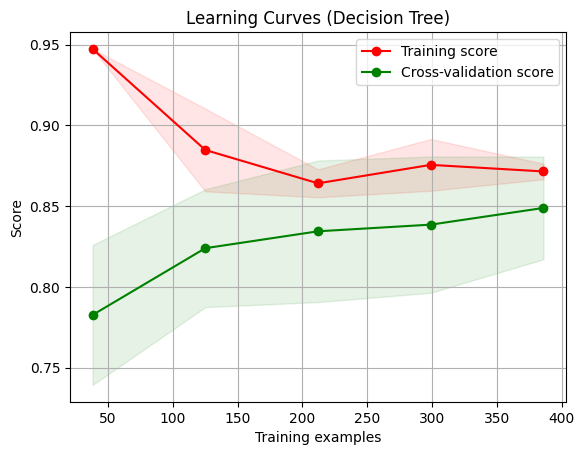

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage example:
title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


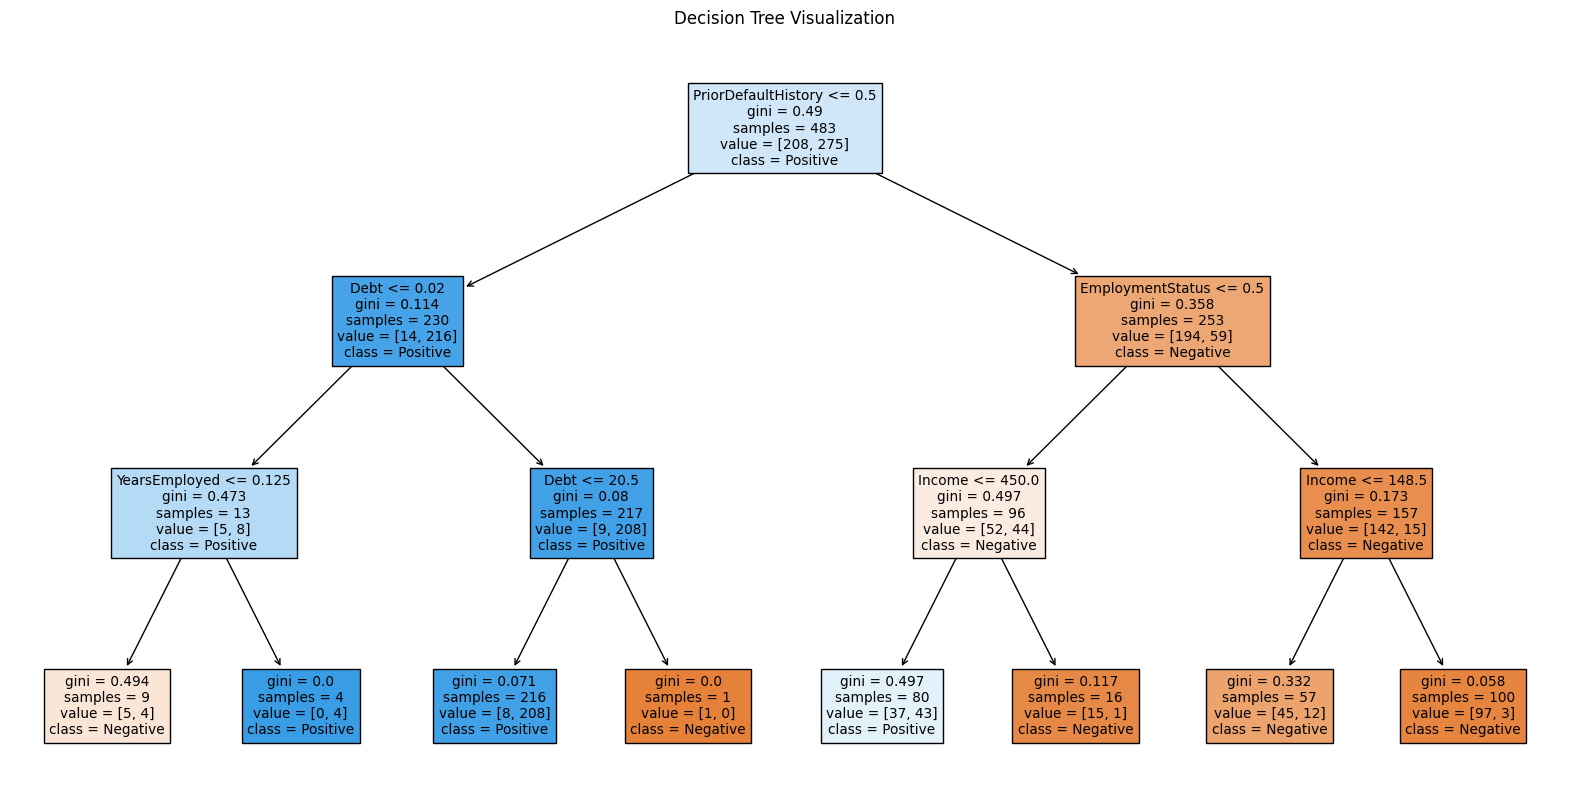

In [175]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

